In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading data
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df = df.drop(['ocean_proximity'] , axis=1)

In [4]:
#getting correlation
df.corr()['total_bedrooms']

longitude             0.069608
latitude             -0.066983
housing_median_age   -0.320451
total_rooms           0.930380
total_bedrooms        1.000000
population            0.877747
households            0.979728
median_income        -0.007723
median_house_value    0.049686
Name: total_bedrooms, dtype: float64

In [5]:
df = df.drop(['longitude' , 'latitude' , 'housing_median_age' , 'median_income' , 'median_house_value'] , axis=1)
df

,total_rooms,total_bedrooms,population,households
0,880.0,129.0,322.0,126.0
1,7099.0,1106.0,2401.0,1138.0
2,1467.0,190.0,496.0,177.0
3,1274.0,235.0,558.0,219.0
4,1627.0,280.0,565.0,259.0
...,...,...,...,...
20635,1665.0,374.0,845.0,330.0
20636,697.0,150.0,356.0,114.0
20637,2254.0,485.0,1007.0,433.0
20638,1860.0,409.0,741.0,349.0


In [6]:
#missing value analysis
df.isnull().sum()

total_rooms         0
total_bedrooms    207
population          0
households          0
dtype: int64

In [7]:
df = df.dropna()
df.reset_index(drop=True , inplace=True)
df.shape

(20433, 4)

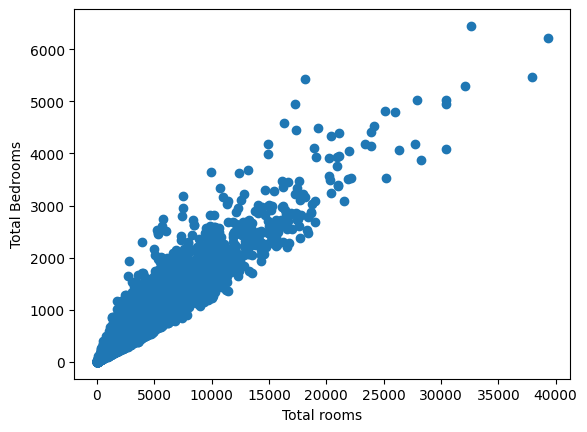

In [8]:
plt.scatter(df['total_rooms'] , df['total_bedrooms'])
plt.xlabel('Total rooms')
plt.ylabel('Total Bedrooms')
plt.show()

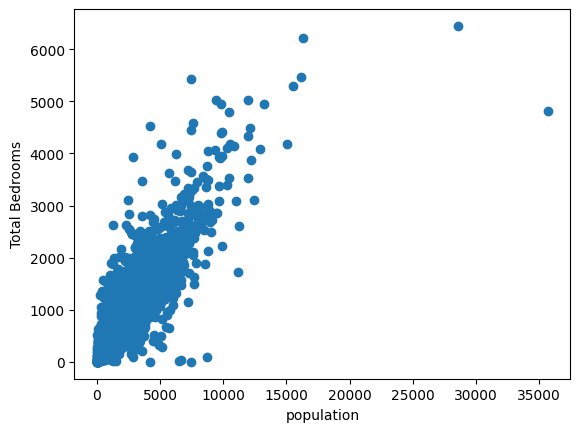

In [9]:
plt.scatter(df['population'] , df['total_bedrooms'])
plt.xlabel('population')
plt.ylabel('Total Bedrooms')
plt.show()

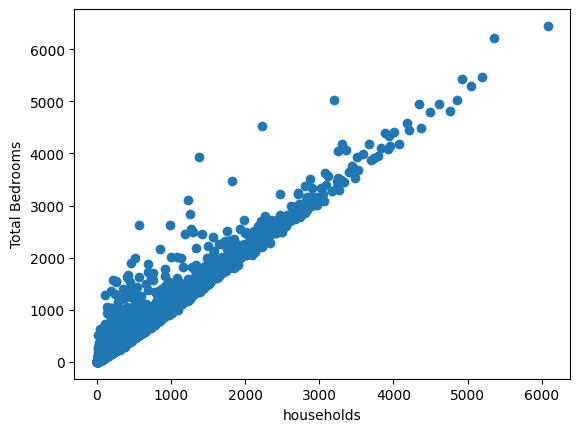

In [10]:
plt.scatter(df['households'] , df['total_bedrooms'])
plt.xlabel('households')
plt.ylabel('Total Bedrooms')
plt.show()

In [11]:
df_np = df.to_numpy()
df_np.shape

(20433, 4)

In [12]:
X_train , Y_train = df_np[: , :3] , df_np[:,-1]
X_train.shape , Y_train.shape

((20433, 3), (20433,))

### using sklearn library

In this step, we implemented a linear regression model using the `LinearRegression()` class from **scikit-learn** to predict the number of bedrooms based on features like population, households, and total bedrooms.

Key steps:
- The model was trained using `X_train` and `Y_train`.
- Predictions were made on the training set using `.predict()`.
- Performance was evaluated using:
  - **Mean Absolute Error (MAE)**: 33.70
  - **Mean Squared Error (MSE)**: 4444.00

We also created a new DataFrame (`predictions_df`) to display original input features along with the predicted values for bedrooms, allowing easy comparison of actual vs predicted output.


In [13]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_train , Y_train)
sklearn_y_predictions = sklearn_model.predict(X_train)
sklearn_y_predictions

array([126.11910275, 976.82131786, 182.07650357, ..., 432.12467475,
       358.55770246, 553.63055043], shape=(20433,))

In [14]:
from sklearn.metrics import mean_absolute_error , mean_squared_error
mean_absolute_error(sklearn_y_predictions , Y_train) , mean_squared_error(sklearn_y_predictions , Y_train)

(33.703807558454976, 4444.00498290698)

In [15]:
predictions_df = pd.DataFrame({'Population' : df['population'],
                               'Households' : df['households'],
                               'Bedrooms' : df['total_bedrooms'],
                               'sklearn bedroom prediction' : sklearn_y_predictions})
predictions_df

,Population,Households,Bedrooms,sklearn bedroom prediction
0,322.0,126.0,129.0,126.119103
1,2401.0,1138.0,1106.0,976.821318
2,496.0,177.0,190.0,182.076504
3,558.0,219.0,235.0,219.488945
4,565.0,259.0,280.0,252.392293
...,...,...,...,...
20428,845.0,330.0,374.0,340.511380
20429,356.0,114.0,150.0,144.045819
20430,1007.0,433.0,485.0,432.124675
20431,741.0,349.0,409.0,358.557702


### Implementing multiple linear regression from scratch

In this section, we manually implement multiple linear regression using NumPy to understand how the model works.

**1. `get_predictions(model, X)`**  
- Adds a column of 1s to `X` for the bias (intercept) term.  
- Multiplies the design matrix with the model coefficients to compute predictions.  
- Mimics how linear models make predictions:  
  \[
  y_{\text{hat}} = X \cdot \beta
  \]

**2. `get_best_model(X, Y)`**  
- Computes the **optimal model parameters** (coefficients) using the **normal equation**:
  \[
  \beta = (X^T X)^{-1} X^T y
  \]
- Uses matrix inversion (`np.linalg.inv`) and dot product to calculate weights that minimize Mean Squared Error (MSE).
- Returns a vector of learned weights including the intercept.

---

#### ✅ Why Do This?

Building the regression model manually helps in:
- Understanding how gradient-free learning (closed-form solution) works
- Validating the results of `sklearn.LinearRegression` using a scratch implementation
- Learning how bias/intercept is handled with a column of ones

This forms the mathematical foundation of linear models and enhances the understanding of model internals.


In [16]:
# Assuming total_bedrooms[i] = (beta_1 * population[i]) + (beta_2 * households[i]) + (beta_3 * total_rooms[i]) + error
# Generally: y[i] = (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + error
# Model:     y_hat[i] = (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i])

def get_predictions(model,X):
    #model: np.array of Floats with shape (p,) of parameters
    #X: np.array of Floats with shape (n, p-1) of inputs
    #returns: np.array of Floats with shape (n,).

    #in this case p-1 is 3 i.e. the no of parameters
    (n,p_minus_one) = X.shape
    p = p_minus_one + 1 # +1 is for the intercept term of error
    

    new_X = np.ones(shape=(n,p)) #making a new matrix which contains all 1's 
    new_X[: , 1:] = X #kind of overides the contains in new X  matrix with that present in X matrix except the first column of 1's 

    return np.dot(new_X , model)

In [17]:
from numpy.linalg import inv

def get_best_model(X,Y):
    '''
  Returns the model with the parameters that minimize the MSE.since that will give us the best model 
  Lower MSE = predictions are closer to actual values

  X: np.array of Floats with shape (n, p-1) of inputs
  y: np.array of Floats with shape (n,) of observed outputs

  Returns: np.array of shape (p,) representing the model.
  '''

    (n,p_minus_one) = X.shape
    p = p_minus_one + 1

    new_X = np.ones(shape=(n,p))
    new_X[: , 1:] = X

    return np.dot(np.dot(inv(np.dot(new_X.T , new_X)), new_X.T),Y)


In [18]:
best_model = get_best_model(X_train,Y_train)
predictions_df['Best Predictions'] = get_predictions(best_model,X_train)
predictions_df

,Population,Households,Bedrooms,sklearn bedroom prediction,Best Predictions
0,322.0,126.0,129.0,126.119103,126.119103
1,2401.0,1138.0,1106.0,976.821318,976.821318
2,496.0,177.0,190.0,182.076504,182.076504
3,558.0,219.0,235.0,219.488945,219.488945
4,565.0,259.0,280.0,252.392293,252.392293
...,...,...,...,...,...
20428,845.0,330.0,374.0,340.511380,340.511380
20429,356.0,114.0,150.0,144.045819,144.045819
20430,1007.0,433.0,485.0,432.124675,432.124675
20431,741.0,349.0,409.0,358.557702,358.557702


### Model Evaluation: MAE and MSE 

To assess the performance of the multiple linear regression model built from scratch, we calculate two key error metrics:

- **Mean Absolute Error (MAE)**:  
  Measures the average absolute difference between predicted and actual values.  
  \[
  \text{MAE} = \frac{1}{n} \sum |y_i - \hat{y}_i|
  \]

- **Mean Squared Error (MSE)**:  
  Penalizes larger errors more heavily by squaring them.  
  \[
  \text{MSE} = \frac{1}{n} \sum (y_i - \hat{y}_i)^2
  \]

**Results:**
- 📉 **MAE:** ~33.70  
- 📉 **MSE:** ~4444.00  

These values indicate that the model predictions are reasonably close to the actual data and are **consistent** with the results from the `scikit-learn` model, validating the custom implementation.


In [19]:
# MAE calculation
mae = np.mean(np.abs(Y_train - predictions_df['Best Predictions']))
print("Mean Absolute Error:", mae)

Mean Absolute Error: 33.70380755845537


In [20]:
# MSE calculation
mse = np.mean((Y_train - predictions_df['Best Predictions']) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 4444.004982906979


###  Evaluating Custom Multiple Linear Regression Model

In this section, we compute important model evaluation and interpretation metrics from scratch using NumPy.

---

1. R² Score (`compute_r_squared`)
- R² (coefficient of determination) tells how well the regression model fits the data.
- It is calculated using:
  \[
  R^2 = 1 - \frac{\text{SS}_{res}}{\text{SS}_{tot}}
  \]
- A value of **0.9695** indicates that ~97% of the variance in the output can be explained by the model.

---

2. Model Coefficients (`coefficients`)
- This function calculates the model weights (intercept and feature coefficients) using the normal equation:
  \[
  \beta = (X^T X)^{-1} X^T y
  \]
- The output shows:
  - 1 bias term (intercept)
  - 4 coefficients (for features like population, households, rooms, etc.)

---

3. Residual Error (`residual_error`)
- Returns the **difference between actual and predicted values**:
  \[
  \text{Residual} = y - \hat{y}
  \]
- These errors help in analyzing where and how much the model deviates from actual values.

---

> These calculations not only validate the accuracy of your model but also demonstrate a deep understanding of how linear regression works at the mathematical level.


In [21]:
def compute_r_squared(X,Y):
    (n,p_minus_one) = X.shape
    p = p_minus_one + 1

    new_x = np.ones(shape=(n,p))
    new_x[:,1:] = X

    # Compute coefficients B = (XᵀX)⁻¹ Xᵀy
    XtX_inv = inv(new_x.T@new_x)
    B = (XtX_inv) @ new_x.T @ Y

    y_pred = new_x @ B

    ss_total = np.sum((Y - np.mean(Y)) ** 2)
    ss_res = np.sum((Y - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_total)

    return r_squared

In [22]:
compute_r_squared(X_train,Y_train)

np.float64(0.9695919230875598)

In [23]:
def coefficients(X,Y):
    (n,p_minus_one) = X.shape
    p = p_minus_one + 1

    new_x = np.ones(shape=(n,p))
    new_x[:,1:] = X

    XtX_inv = inv(new_x.T@new_x)
    B = (XtX_inv) @ new_x.T @ Y

    return B

In [24]:
B = coefficients(X_train,Y_train)
B

array([ 1.05504960e+01, -1.22420185e-03,  7.29926177e-01,  6.98305202e-02])

In [25]:
def residual_error(X,Y):
    (n,p_minus_one) = X.shape
    p = p_minus_one + 1

    new_x = np.ones(shape=(n,p))
    new_x[:,1:] = X

    XtX_inv = inv(new_x.T@new_x)
    B = (XtX_inv) @ new_x.T @ Y

    y_pred = new_x @ B

    residual = Y - y_pred

    return residual

In [26]:
residual_error(X_train,Y_train)

array([-1.19102750e-01,  1.61178682e+02, -5.07650357e+00, ...,
        8.75325247e-01, -9.55770246e+00, -2.36305504e+01], shape=(20433,))

### Actual vs Predicted Plot

This scatter plot visualizes the relationship between the **actual target values (`Y_train`)** and the **predicted values** from our multiple regression model (`Best Predictions`).

- Each point represents a prediction.
- The **dashed diagonal line (45°)** indicates perfect predictions where `actual = predicted`.

If the model performs well, most points should lie **close to the diagonal line**, indicating high accuracy. In our case, the tight clustering around the line suggests a **strong fit** between the actual and predicted values.

This plot is an effective visual diagnostic to spot:
- Under- or over-prediction trends
- Outliers
- Prediction variance across the target range


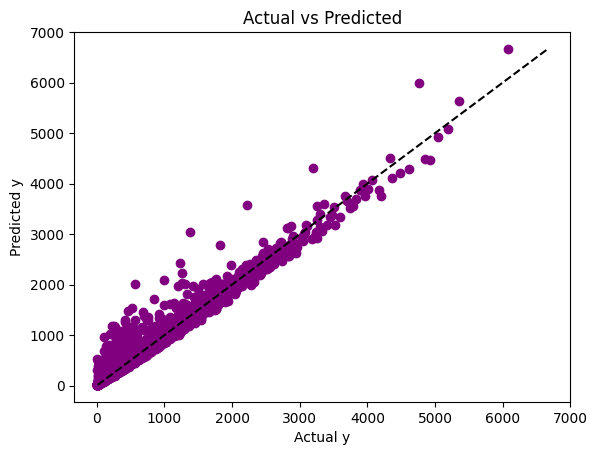

In [27]:
plt.scatter(Y_train, predictions_df['Best Predictions'], color='purple')
plt.plot([predictions_df['Best Predictions'].min(),predictions_df['Best Predictions'].max()], [predictions_df['Best Predictions'].min(), predictions_df['Best Predictions'].max()], 'k--')  # 45° line
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Actual vs Predicted')
plt.show()


### Converting DataFrame to NumPy Array & Manual Prediction

We first convert the DataFrame `predictions_df` into a NumPy array to facilitate numerical computations.

From this array, we extract the relevant feature columns:
- **Population** → Column 0
- **Households** → Column 1
- **Total Rooms** → Column 2

Using the learned coefficients (`B`), we then **manually compute predictions (`y_pred`)** for each row using the regression formula:

\[
\hat{y}_i = \beta_0 + \beta_1 \cdot x_1 + \beta_2 \cdot x_2 + \beta_3 \cdot x_3
\]

Where:
- \( \beta_0 \) is the intercept (`B[0]`)
- \( \beta_1, \beta_2, \beta_3 \) are coefficients for population, households, and total rooms respectively
- \( x_1, x_2, x_3 \) are the feature values per sample

This step helps verify and understand the prediction process at a granular level, without using library `.predict()` methods.


In [28]:
predictions_df_np = predictions_df.to_numpy()
predictions_df_np

array([[ 322.        ,  126.        ,  129.        ,  126.11910275,
         126.11910275],
       [2401.        , 1138.        , 1106.        ,  976.82131786,
         976.82131786],
       [ 496.        ,  177.        ,  190.        ,  182.07650357,
         182.07650357],
       ...,
       [1007.        ,  433.        ,  485.        ,  432.12467475,
         432.12467475],
       [ 741.        ,  349.        ,  409.        ,  358.55770246,
         358.55770246],
       [1387.        ,  530.        ,  616.        ,  553.63055043,
         553.63055043]], shape=(20433, 5))

In [29]:
population = predictions_df_np[:,0] 
households = predictions_df_np[:,1]
total_rooms = predictions_df_np[:,2]

In [30]:
n = len(X_train)
y_pred = np.zeros(n)
for i in range(n):
    y_pred[i] = B[0] * population[i] + B[0] * households[i] + B[0] * total_rooms[i] + mse

y_pred

array([10531.6412001 , 53451.05910573, 13549.08306859, ...,
       24753.70986696, 20259.19855236, 31168.41146151], shape=(20433,))